<a href="https://colab.research.google.com/github/MarcoVallesG/FisicaComputacional1_/blob/master/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
#Importando las bibliotecas a utilizar
import numpy as np
import pandas as pd

# Creamos un DataFrame compra a partir del archivo de texto de los datos diarios de la estacion en nuestro repositorio:

url = "https://raw.githubusercontent.com/MarcoVallesG/FisicaComputacional1_/master/Actividad1/ClimatologiadiariaTrincheras.txt"
#La URL del archivo de datos que esta guardado en mi repositorio de GH
encabezados=["Fecha","Precip","Evap","TMax","TMin"] 

df_climd = pd.read_csv(url, names=encabezados, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine="python")
#El df read se declara con (url del archivo que usaras, names=titulo columnas, encoding=formato , sep= la separacion de los datos en el archivo,
#header= titulo, skiprows=numero de renglones que quieres que se omitan del principio, skipfooter= numero de renglones que quieres que se omitan del final,
#engine= el motor que lo leera)


#print(df_climd.head(10)) #Para imprimir los primeros diez renglones del df
#print(df_climd.tail(10)) #Para imprimir los ultimos diez renglones del df
#df_climd.shape #Para imprimir la forma del df (Renglones, columnas). En mi caso es de (19793, 5) 
#df_climd.info() #Para imprimir la informacion del df (Cuantas columnas, nombres de columnas, conteo de datos por columnas, tipo de dato)

df_climd0=df_climd.copy() #Creando un df con el cual trabajaremos, el otro lo mantendremos intacto
#df_climd0.head(10) #Para imprimir los primeros diez renglones de la copia del df
#print(df_climd.tail(10)) #Para imprimir los ultimos diez renglones del df
#df_climd0.shape #Para imprimir la forma de la copia del df (Renglones, columnas). En mi caso es de (19793, 5) 
#str_Nulo='Nulo'
#df_datclim1=df_datclim0.replace(to_replace=str_Nulo, value=' ', regex=True) #Este df no tendra ningun "Nulo" en sus casillas.
#df_datclim1.head()

str_Nulo="Nulo"
df_climd1=df_climd0.replace(to_replace=str_Nulo, value=' ', regex=True) #Este df no tendra ningun "Nulo" en sus casillas.
df_climd1.head(10)
#Ya tenemos la copia y no aparece la palabra nulo en ningun lado

#Pasando los datos a númerico
cols_list=["Precip","Evap","TMax","TMin"]
for cols in cols_list:
  df_climd1[cols]=pd.to_numeric(df_climd1[cols], errors="coerce")
#Si no es un numero aparecera como Nan
#df_climd1.info() #Para asegurarnos de que este bien
#Ahora comenzaremos a contar los números que hacen falta
#df_climd1.isnull().sum()#Fecha         0
                         #Precip       19
                         #Evap      10428
                         #TMax        207
                         #TMin        312
#Como vemos hacen falta muchos datos de la evaporacion y en cuanto a los demás siento que son pocos para los años que se tienen

#df_climd1.head(10)
#df_climd1.tail(10) #Para imprimir los primeros 10 y los ultimos 10 datos

#Comenzaremos con el analisis estadistico
#df_climd1.describe()
#No parece haber error en los datos, conteos muy similares exceptuando a la evaporacion, en cuanto a lo demas todo parece correcto sin ningun tipo de fallo
	#Precip	Evap	TMax	TMin
#count	19774.000000	9365.000000	19586.000000	19481.000000
#mean	0.783544	6.119135	31.230415	11.624891
#std	4.445019	3.219043	7.864635	7.379594
#min	0.000000	0.100000	6.500000	-11.000000
#25%	0.000000	3.500000	25.000000	5.500000
#50%	0.000000	5.600000	32.000000	11.000000
#75%	0.000000	8.500000	38.000000	18.000000
#max	151.000000	17.900000	49.500000	30.000000

#Comenzaremos a trabajar con las fechas
#Para ello comenzaremos realizando una copia del documento que tenemos hasta ahora
df_climd2=df_climd1.copy()
#df_climd2["Fecha"].head() #Para imprimir solo la columna de las fechas

df_climd2["Fecha"]=pd.to_datetime(df_climd2["Fecha"], dayfirst=True).copy() #Cambiando los datos de la columna Fechas
df_climd2["Fecha"].head()
#df_climd2.dtypes #Checando el tipo de dato de las columnas.

df_climd2["Año"]=df_climd2["Fecha"].dt.year #Añadiendo una columna 'Año' al df con el año respectivo 
df_climd2["Mes"]=df_climd2["Fecha"].dt.month #Añadiendo una columna 'Mes' al df con el mes respectivo 

#df_climd2.head(10)
#df_climd2.tail(10)

#df_climd2.info() #Para ver que todo este bien
#Creando una copia para trabajar en la actividad 4
df_climd3=df_climd2.copy()

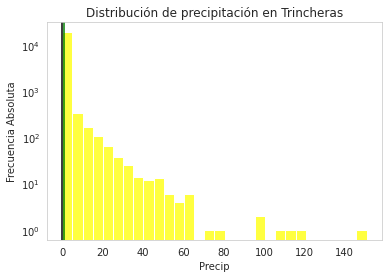

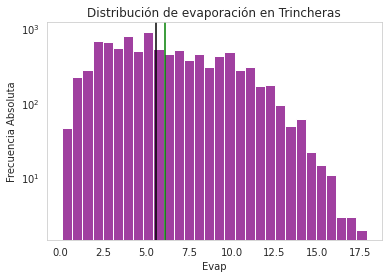

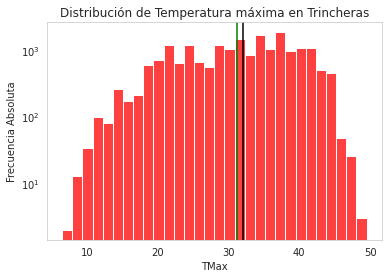

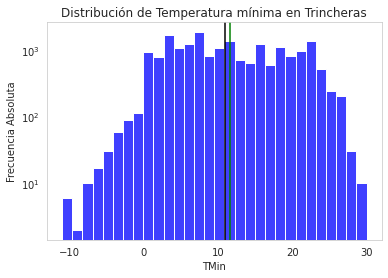

In [216]:
#Importando las bibliotecas que se utilizaran
import matplotlib.pyplot as plt
import seaborn as sns

#Para las graficas
#plt.hist(df_climd3.Precip, bins=30) #Pidiendo que grafique un histograma con los datos de climd3 y la columna Precip
#plt.xlabel("Precipitacion (mm)") #Titulo del eje x
#plt.ylabel("Frecuencia absoluta") #Titulo del eje y
#plt.title("Distribución de precipitación en Trincheras") #Titulo del grafico
#plt.grid()
#plt.show()

#A partir de esto no se pueden apreciar bien los datos, por eso, cambiaremos a escala logaritmica


#plt.hist(df_climd3.Precip, bins=30)
#plt.yscale("log") #Cambiando la escala del eje y a escala logaritmica
#plt.xlabel("Precipitacion (mm)")
#plt.ylabel("log(Frecuencia absoluta)")
#plt.title("Distribución de precipitación en Trincheras")
#plt.grid()
#plt.show()

#Ahora veremos lo mismo pero con seaborn
#Para el primer caso
#sns.set_style("whitegrid")
#plt.xlabel("Precipitacion (mm)")
#plt.ylabel("Frequencia Absoluta") 
#plt.title("Distribución de Precipitación en Trincheras")
#sns.histplot(data=df_climd3, x="Precip",bins=30)

#Para el segundo caso(escala logaritmica)
#sns.set_style("whitegrid") 
#plt.xlabel("Precipitacion (mm)")
#plt.ylabel("Frequencia Absoluta")
#plt.title("Distribución de Precipitación en Trincheras")
#sns.histplot(data=df_climd3, x="Precip",bins=30,log_scale=(False,True))

#Comenzaremos con las graficas de todas las variables que se nos piden
#HISTOGRAMAS
#PRECIPITACION
sns.set_style("whitegrid")

Precmed=df_climd3.Precip.median()
Precmean=df_climd3.Precip.mean()

sns.histplot(df_climd3["Precip"],kde=False,color="yellow", bins=30)


plt.axvline(x=Precmed,color="black",label="Mediana")
plt.axvline(x=Precmean,color="green",label="Media")

plt.title("Distribución de precipitación en Trincheras")
plt.yscale("log")
#plt.xlabel("log(Precipitación (mm))")
plt.ylabel("Frecuencia Absoluta")
plt.grid()
plt.show()

#EVAPORACION
print("\n")
sns.set_style("whitegrid")

Evamed=df_climd3.Evap.median()
Evamean=df_climd3.Evap.mean()

sns.histplot(df_climd3["Evap"],kde=False,color="purple", bins=30)


plt.axvline(x=Evamed,color="black",label="Mediana")
plt.axvline(x=Evamean,color="green",label="Media")

plt.title("Distribución de evaporación en Trincheras")
plt.yscale("log")
#plt.xlabel("log(Evaporación")
plt.ylabel("Frecuencia Absoluta")
plt.grid()
plt.show()

#TMAX
print("\n")
sns.set_style("whitegrid")

Tmaxmed=df_climd3.TMax.median()
Tmaxmean=df_climd3.TMax.mean()

sns.histplot(df_climd3["TMax"],kde=False,color="red", bins=30)


plt.axvline(x=Tmaxmed,color="black",label="Mediana")
plt.axvline(x=Tmaxmean,color="green",label="Media")

plt.title("Distribución de Temperatura máxima en Trincheras")
plt.yscale("log")
#plt.xlabel("log(TMax(°C))")
plt.ylabel("Frecuencia Absoluta")
plt.grid()
plt.show()

#TMIN
print("\n")
sns.set_style("whitegrid")

Tminmed=df_climd3.TMin.median()
Tminmean=df_climd3.TMin.mean()

sns.histplot(df_climd3["TMin"],kde=False,color="blue", bins=30)


plt.axvline(x=Tminmed,color="black",label="Mediana")
plt.axvline(x=Tminmean,color="green",label="Media")

plt.title("Distribución de Temperatura mínima en Trincheras")
plt.yscale("log")
#plt.xlabel("log(TMin(°C))")
plt.ylabel("Frecuencia Absoluta")
plt.grid()
plt.show()


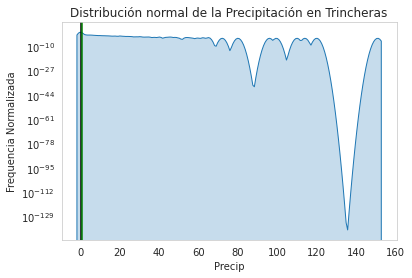

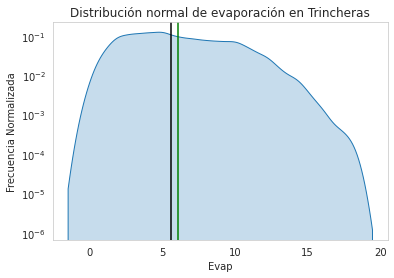

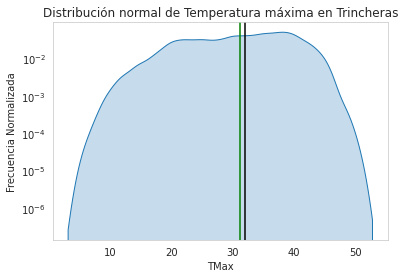

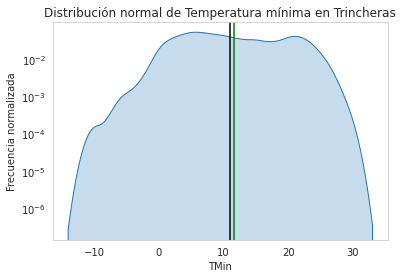

In [221]:
#Comenzaremos ahora con las funciones de densidad de probabilidad
sns.kdeplot(df_climd3["Precip"],fill=True)
plt.axvline(x=Precmed,color="black",label="Mediana")
plt.axvline(x=Precmean,color='green',label="Media")

plt.title("Distribución normal de la Precipitación en Trincheras")
plt.yscale("log")
#plt.xlabel("Precipitación (mm)")
plt.ylabel("Frequencia Normalizada")
plt.grid()
plt.show()

#EVAPORACION
print("\n")
sns.kdeplot(df_climd3["Evap"], fill=True)

plt.axvline(x=Evamed,color="black",label="Mediana")
plt.axvline(x=Evamean,color="green",label="Media")

plt.title("Distribución normal de evaporación en Trincheras")
plt.yscale("log")
#plt.xlabel("Evaporación")
plt.ylabel("Frecuencia Normalizada")
plt.grid()
plt.show()

#TMAX
print("\n")

sns.kdeplot(df_climd3["TMax"],fill=True)


plt.axvline(x=Tmaxmed,color="black",label="Mediana")
plt.axvline(x=Tmaxmean,color="green",label="Media")

plt.title("Distribución normal de Temperatura máxima en Trincheras")
plt.yscale("log")
#plt.xlabel("TMax(°C)")
plt.ylabel("Frecuencia Normalizada")
plt.grid()
plt.show()

#TMIN
print("\n")

sns.kdeplot(df_climd3["TMin"],fill=True)


plt.axvline(x=Tminmed,color="black",label="Mediana")
plt.axvline(x=Tminmean,color="green",label="Media")

plt.title("Distribución normal de Temperatura mínima en Trincheras")
plt.yscale("log")
#plt.xlabel("TMin(°C)")
plt.ylabel("Frecuencia normalizada")
plt.grid()
plt.show()

#$\underline{\text{Gráficas de distribución acumulada y normal}}$
Aqui comenzamos a juntar ambas gráficas, la de frecuencia absoluta y la distribución normal

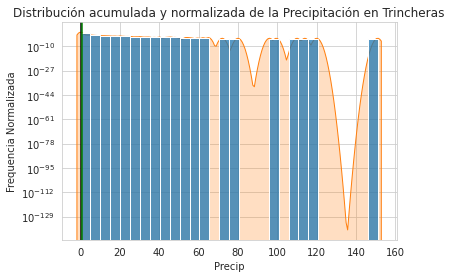

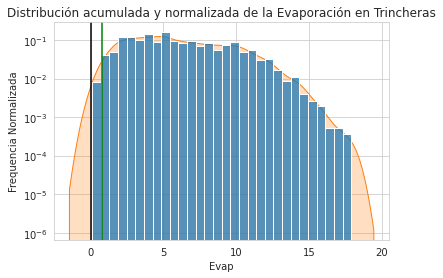

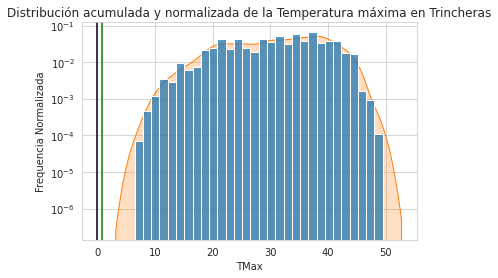

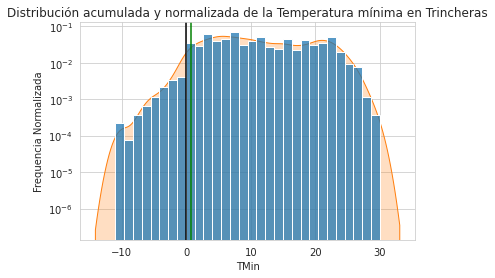

In [225]:
#Comenzamos a juntar ambas graficas
#PRECIPITACION
sns.set_style("whitegrid")

sns.histplot(data=df_climd3, x="Precip", bins=30, stat="density");
sns.kdeplot(df_climd3.Precip, fill=True);

plt.axvline(x=Precmed,color="black",label="Mediana")
plt.axvline(x=Precmean,color="green",label="Media")

plt.yscale("log")
#plt.xlabel("Precipitación (mm)")
plt.ylabel("Frequencia Normalizada")
plt.title("Distribución acumulada y normalizada de la Precipitación en Trincheras")

plt.show()

#EVAPORACION
print("\n")
sns.set_style("whitegrid")

sns.histplot(data=df_climd3, x="Evap", bins=30, stat="density");
sns.kdeplot(df_climd3.Evap, fill=True);

plt.axvline(x=Precmed,color="black",label="Mediana")
plt.axvline(x=Precmean,color="green",label="Media")

plt.yscale("log")
#plt.xlabel("Evaporación")
plt.ylabel("Frequencia Normalizada")
plt.title("Distribución acumulada y normalizada de la Evaporación en Trincheras")

plt.show()

#TMAX
print("\n")
sns.set_style("whitegrid")

sns.histplot(data=df_climd3, x="TMax", bins=30, stat="density");
sns.kdeplot(df_climd3.TMax, fill=True);

plt.axvline(x=Precmed,color="black",label="Mediana")
plt.axvline(x=Precmean,color="green",label="Media")

plt.yscale("log")
#plt.xlabel("TMax(°C)")
plt.ylabel("Frequencia Normalizada")
plt.title("Distribución acumulada y normalizada de la Temperatura máxima en Trincheras")

plt.show()

#TMIN
print("\n")
sns.set_style("whitegrid")

sns.histplot(data=df_climd3, x="TMin", bins=30, stat="density");
sns.kdeplot(df_climd3.TMin, fill=True);

plt.axvline(x=Precmed,color="black",label="Mediana")
plt.axvline(x=Precmean,color="green",label="Media")

plt.yscale("log")
#plt.xlabel("TMin(°C)")
plt.ylabel("Frequencia Normalizada")
plt.title("Distribución acumulada y normalizada de la Temperatura mínima en Trincheras")

plt.show()

#$\underline{\text{Gráfica de cajas}}$
Graficaremos ahora los datos de la evaporación, temperatura máxima y mínima pero ahora en gráfica de cajas

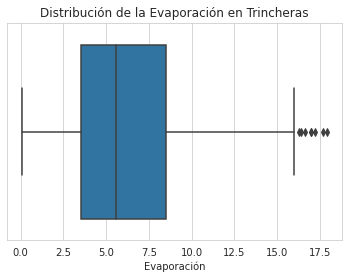

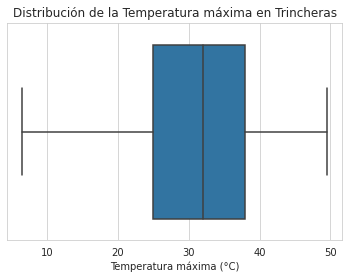

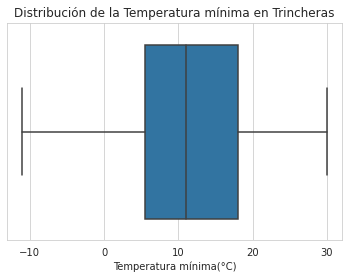

In [226]:
#Grafica de cajas 
#EVAPORACION
sns.set_style('whitegrid')
sns.boxplot(x=df_climd3.Evap,data=df_climd3,orient="h").set(xlabel="Evaporación",title="Distribución de la Evaporación en Trincheras");
plt.show()

#TMAX
print("\n")
sns.set_style('whitegrid')
sns.boxplot(x=df_climd3.TMax,data=df_climd3,orient="h").set(xlabel="Temperatura máxima (°C)",title="Distribución de la Temperatura máxima en Trincheras");
plt.show()

#TMAX
print("\n")
sns.set_style('whitegrid')
sns.boxplot(x=df_climd3.TMin,data=df_climd3,orient="h").set(xlabel="Temperatura mínima(°C)",title="Distribución de la Temperatura mínima en Trincheras");
plt.show()


#$\underline{\text{Gráficas de barras de la precipitación}}$

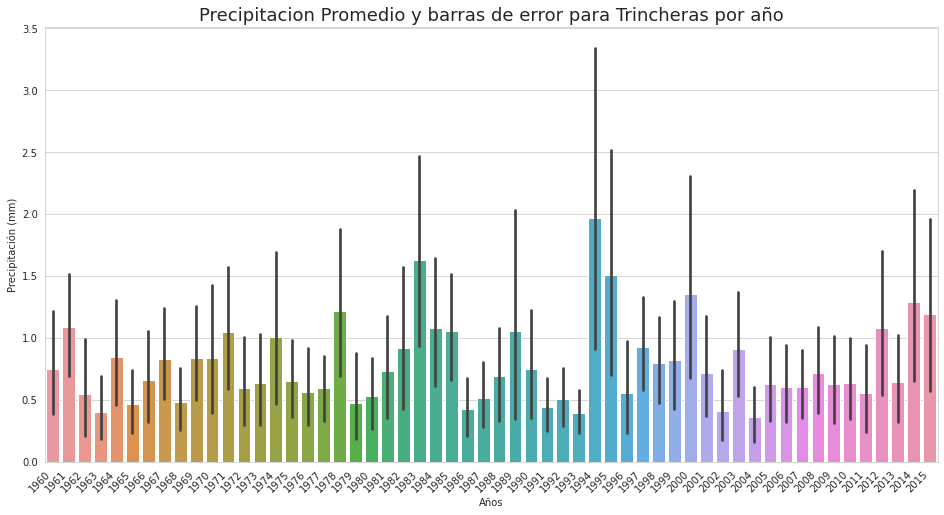

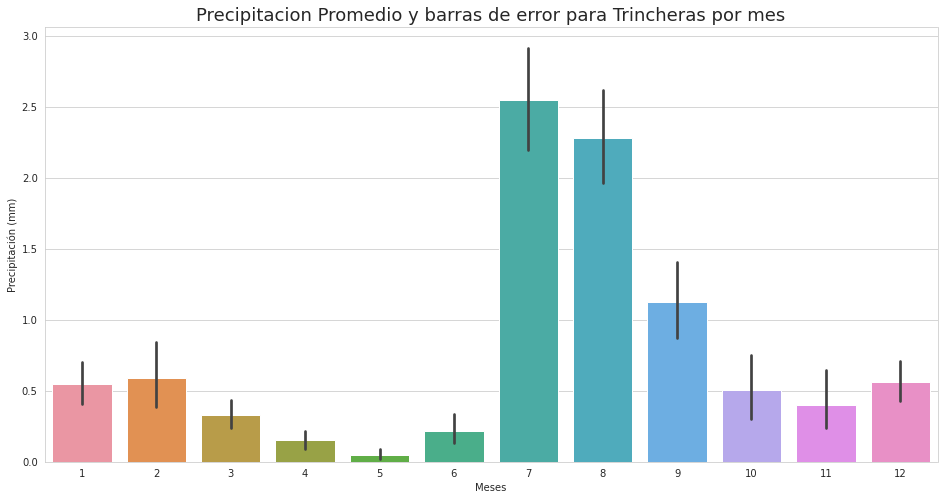

In [227]:
#AÑOS
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

Precipbar=sns.barplot(x="Año", y="Precip", data=df_climd3);
Precipbar.set_xticklabels(Precipbar.get_xticklabels(), rotation=45, horizontalalignment="right");

plt.title("Precipitacion Promedio y barras de error para Trincheras por año", fontsize=18)
Precipbar.set(xlabel="Años", ylabel="Precipitación (mm)")
plt.show()



#MESES
print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

Precipmesbar=sns.barplot(x="Mes", y="Precip", data=df_climd3);
#Precipmesbar.set_xticklabels(Precipmesbar.get_xticklabels(), rotation=45, horizontalalignment="right");

plt.title("Precipitacion Promedio y barras de error para Trincheras por mes", fontsize=18)
Precipmesbar.set(xlabel="Meses", ylabel="Precipitación (mm)")
plt.show()

#$\underline{\text{Colección de los ultimos 30 años}}$
Creamos un grupo de los últimos treinta años para obtener gráficas de precipitación, temperaturas máximas y mínimas

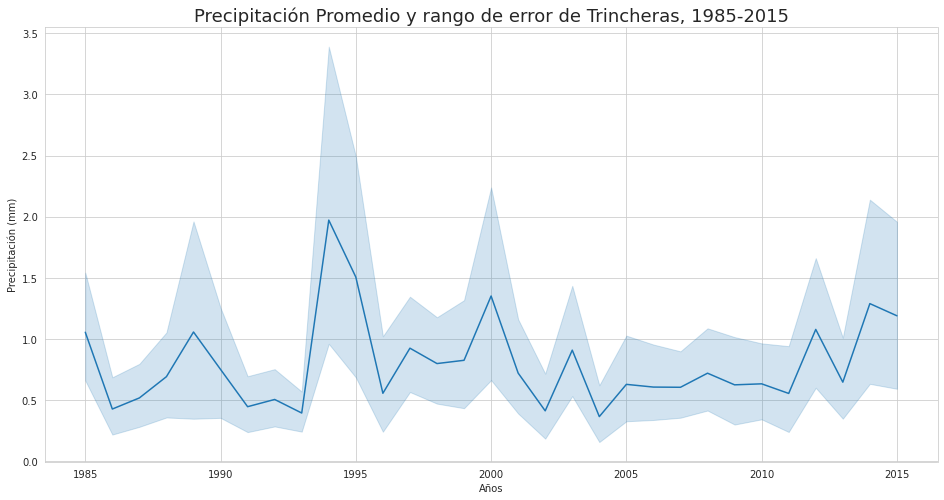

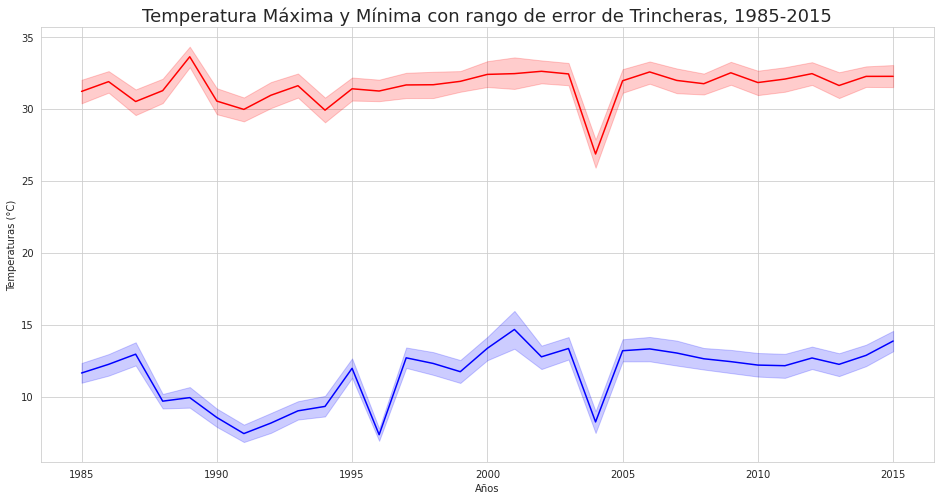

In [188]:
#Generando el rango de años
df_30=df_climd3[(df_climd3["Año"]>=1985)&(df_climd3["Año"]<=2015)]

#PRECIPITACION
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

PrecipLin30=sns.lineplot(x="Año", y="Precip", data=df_30);


PrecipLin30.set(xlabel="Años", ylabel="Precipitación (mm)")
plt.title("Precipitación Promedio y rango de error de Trincheras, 1985-2015", fontsize=18)

plt.show()

#TMAX Y TMIN
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

TMaxLin30=sns.lineplot(x="Año", y="TMax", data=df_30, color="red");
TMinLin30=sns.lineplot(x="Año", y="TMin", data=df_30, color="blue");


TMaxLin30.set(xlabel="Años", ylabel="Temperaturas (°C)")
plt.title("Temperatura Máxima y Mínima con rango de error de Trincheras, 1985-2015", fontsize=18)

plt.show()

#$\underline{\text{Gráficas de caja para temperaturas por mes}}$
Se harán varias gráficas de cajas para mostrar la variación de temperaturas entre los meses.

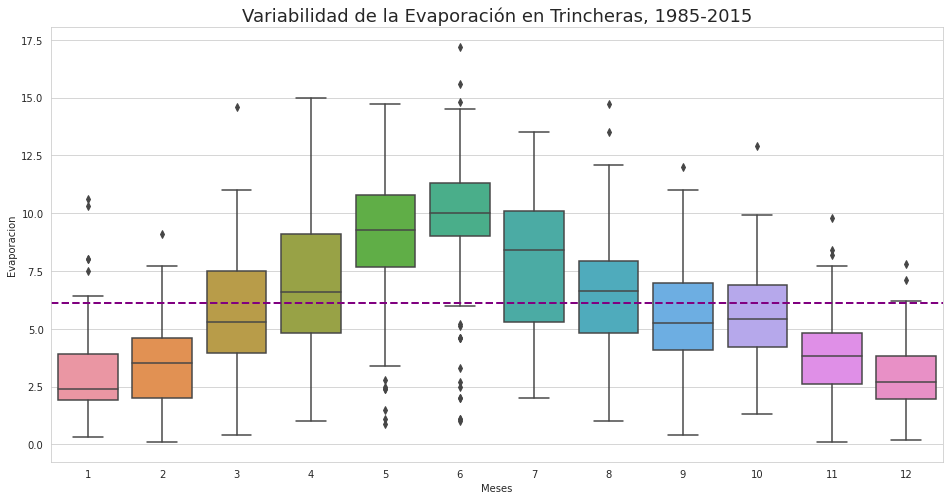

Evaporación promedio =  6.119135077415897




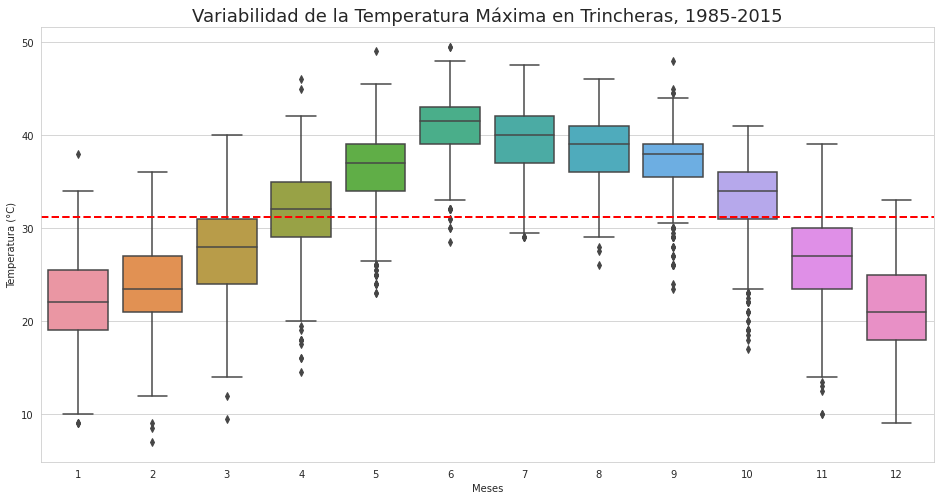

prom(TMax) =  31.230414581844176




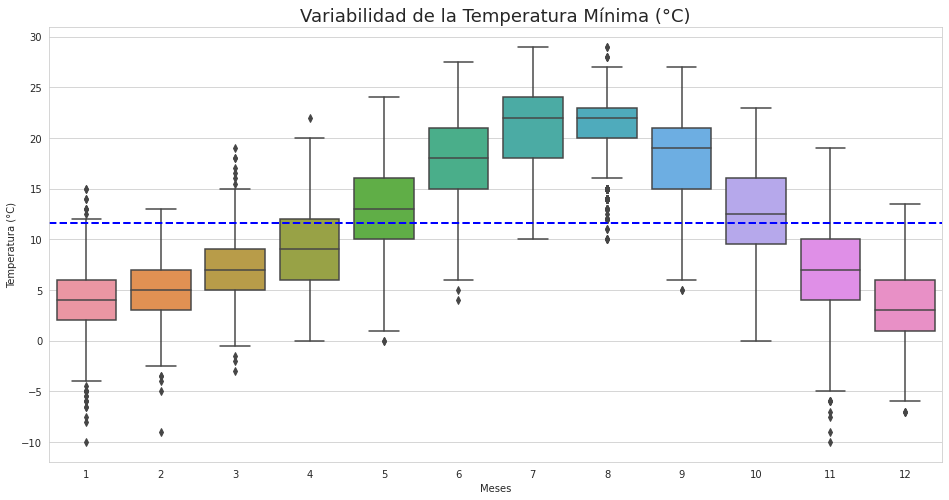

prom(TMin) =  11.624890919357322
Dif TMax_prom-TMin_prom =  19.605523662486853


In [228]:
#EVAPORACION
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
#Promedio
Evap_prom=df_climd3.Evap.mean()

BoxEvap30=sns.boxplot(x="Mes", y="Evap", data=df_30)
plt.axhline(Evap_prom, color="purple", linestyle="--", linewidth=2);
BoxEvap30.set(xlabel="Meses", ylabel="Evaporacion");
plt.title("Variabilidad de la Evaporación en Trincheras, 1985-2015", fontsize=18)
plt.show()
print("Evaporación promedio = ", Evap_prom)

#TEMPERATURAS
print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

#PROMEDIO DE TEMPERATURAS
TMax_prom = df_climd3.TMax.mean()
TMin_prom = df_climd3.TMin.mean()

# Gráfica de cajas de la Temperatura 
BoxTMax30=sns.boxplot(x="Mes", y="TMax", data=df_30);

plt.axhline(TMax_prom, color = "red", linestyle="--", linewidth=2);

BoxTMax30.set(xlabel="Meses", ylabel="Temperatura (°C)")
plt.title("Variabilidad de la Temperatura Máxima en Trincheras, 1985-2015", fontsize=18)

plt.show()
print("prom(TMax) = ", TMax_prom)

#MIN
print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
BoxTMin30=sns.boxplot(x="Mes", y="TMin", data=df_30);
plt.axhline(TMin_prom, color = "blue", linestyle="--", linewidth=2);
BoxTMin30.set(xlabel="Meses", ylabel="Temperatura (°C)")
plt.title("Variabilidad de la Temperatura Mínima (°C)", fontsize=18)
plt.show()

print("prom(TMin) = ", TMin_prom)
print("Dif TMax_prom-TMin_prom = ", (TMax_prom - TMin_prom))